### Aim of anlysis
After viewing all forests in the world and characteristics of tropical dry forests. I want to perform analysis on the <b>Tropical and subtropical moist broadleaf forests in West Africa</b>

# **DATASETS DESCRIPTION**

**Administrative bounndaries from external data source**

* `world_data` - **Administrative boundaries of all countries in the world** (data source: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/)
 * `continent` - **Administrative boundaries of all countries in Africa** (data source: clipped from world_data based on observations that have continent as Africa)
 * `subregion` - **Administrative boundaries of all countries in West Africa** (data source: clipped from continent based on observations that have subregion as Western Africa)

> The following dataset is gotten from the data library [here](https://datasets.mojaglobal.workers.dev/0:/)

1. **Bioclimatic & Ecological Zones**

  * `fav_forest` - **Tropical and subtropical moist broadleaf forests global data** (data source: GlobalAgroEcologicalZones_GAEZ.geojson
 * `agroeco_df` - **Global AgroEcological Zones** (data source: GlobalAgroEcologicalZones_GAEZ.geojson)
 * `gaez` - **AGro ecological zones of Tropical and subtropical moist broadleaf forests in west Africa** (data source: clipped data on agroeco_df and fav_forest)
 * `clipped1` - **.tiff files on `water scarcity, soil resource nutrients, dominant land cover, rainfed soil terrain suitability, rooting conditions, protected areas, protected areas restricted agricultures`**

2. Climate
 * `cliamte` - **IPCC Climate zone map** (data source: IPCC_ClimateZoneMap_Vector.geojson)
 * `clim` - **Climate zones of Tropical and subtropical moist broadleaf forests in west Africa** (data source: clipped data on climate and fav_forest)
 * `clim_shift` - **Climate shifts according to Koppen-Geiger from 1901 - 2000 and 2001 to 2100 based on different scenarios** ( data source: KoppenGeigerClimateShifts/)
 * `forest_clim_shift` - **Climate shifts of Tropical and subtropical moist broadleaf forests in west Africa** (data source: clipped data on clim_shift and fav_forest)

In [9]:
from shapely.geometry import mapping
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et
import rasterio
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import requests

In [10]:
class Read():
    """
    A class used to read and clean data 

    ...

    Attributes
    ----------
    url : str
        the link or path to the file
    columns : list
        The column to retrieve from the data

    Methods
    -------
    retrieve_data()
        fetches data from the internet
    """
    def __init__(self, url, columns = None):
        self.url = url
        self.columns = columns
        
    def retrieve_data(self):
        self.req = requests.get(self.url)
        self.req = str(self.req.text)

    def wrangle(self, online = False, change_columns = False, new_columns = None, replace_values = False,
               column_to_replace= None, replacing_values = None, clip = False):
        """Read in and wrangle data
         Parameters
        ----------
        online : bool
            If the data is retrieved from the internet
        change_columns : bool
            if columns of data should be changed
        new_columns: list
           new columns of data
        replace_values : bool
            if values in the data should be changed
        column_to_replace: str
            column of values to change
        replacing_values : list
            the new values to change initial values to
        clip : bool
            if geodataframe should be clipped based on another frame
        """
        if online:
            self.url = self.req
        self.df = gpd.read_file(self.url)
        if change_columns:
            self.df = self.df[self.columns]
            self.df.columns = new_columns
        self.df = self.df.replace(['n/a', 'Unknown'], np.nan)
        self.df.columns = self.df.columns.str.lower()
        if replace_values:
            self.df[column_to_replace] = self.df[column_to_replace].replace(replacing_values)
        self.df['centroid'] = self.df.geometry.centroid
        self.df.crs = {'init' :'epsg:4326'}
        if clip:    
            self.df = gpd.clip(self.df, subregion)
            self.df = gpd.clip(self.df, fav_forest)
        return self.df

In [11]:
def plot(data, column):
    data.plot(column = column, legend = True, cmap = 'winter',
          legend_kwds = {'ncol': 2, 'loc' : 'center', 'bbox_to_anchor': (1.5, 0.5)})
    plt.xlim(-20,20)

In [12]:
def plot_within(data, column, title, ncol):
    ax = data.plot(column = column,  figsize= (20, 8), legend = True, cmap = 'winter',
                        legend_kwds = {'ncol': ncol, 'loc' : 'center', 'bbox_to_anchor': (1.2, 0.5)})
    fav_forest.plot(ax = ax, color = 'brown')
    plt.title(title, fontdict = {'fontsize' : 18});

In [13]:
fav_forest = Read('data/forest.geojson')
fav_forest = fav_forest.wrangle()

fav_forest.head(2)

,eco_name,biome,geometry,centroid
0,Himalayan subtropical broadleaf forests,Tropical and subtropical moist broadleaf forests,"POLYGON ((80.58687 28.99289, 80.59087 28.98954...",POINT (80.55655 28.96448)
1,Himalayan subtropical broadleaf forests,Tropical and subtropical moist broadleaf forests,"POLYGON ((-68.99775 11.44887, -68.99537 11.447...",POINT (-68.95545 11.41354)


In [14]:
print(f"Names of Tropical and subtropical moist broadleaf forests are:{list(fav_forest['eco_name'].unique())}")

Names of Tropical and subtropical moist broadleaf forests are:['Himalayan subtropical broadleaf forests', 'Upper Gangetic Plains moist deciduous forests', 'Sundarbans freshwater swamp forests', 'Northern Indochina subtropical forests', 'Lower Gangetic Plains moist deciduous forests', 'Brahmaputra Valley semi-evergreen forests', 'Eastern highlands moist deciduous forests', 'Orissa semi-evergreen forests', 'Irrawaddy moist deciduous forests', 'Mizoram-Manipur-Kachin rain forests', 'Northern Annamites rain forests', 'Hainan Island monsoon rain forests', 'South China-Vietnam subtropical evergreen forests', 'Malabar Coast moist forests', 'Tonle Sap-Mekong peat swamp forests', 'Chao Phraya lowland moist deciduous forests', 'Chao Phraya freshwater swamp forests', 'North Western Ghats montane rain forests', 'North Western Ghats moist deciduous forests', 'Northern Khorat Plateau moist deciduous forests', 'Kayah-Karen montane rain forests', 'Luang Prabang montane rain forests', 'Northern Thailan

### Administrative

In [15]:
columns = ['CONTINENT','NAME_LONG', 'SUBREGION', 'geometry']
new_columns = ['continent', 'country', 'SUBREGION', 'geometry']
world_data = Read('zip://data/ne_110m_admin_0_countries.zip', columns)
world_data = world_data.wrangle(change_columns = True, new_columns = new_columns)
continent = world_data[world_data['continent'] == 'Africa']
subregion = continent[continent['subregion'] == 'Western Africa']

continent.head(2)

,continent,country,subregion,geometry,centroid
1,Africa,Tanzania,Eastern Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)
2,Africa,Western Sahara,Northern Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",POINT (-12.13783 24.29117)


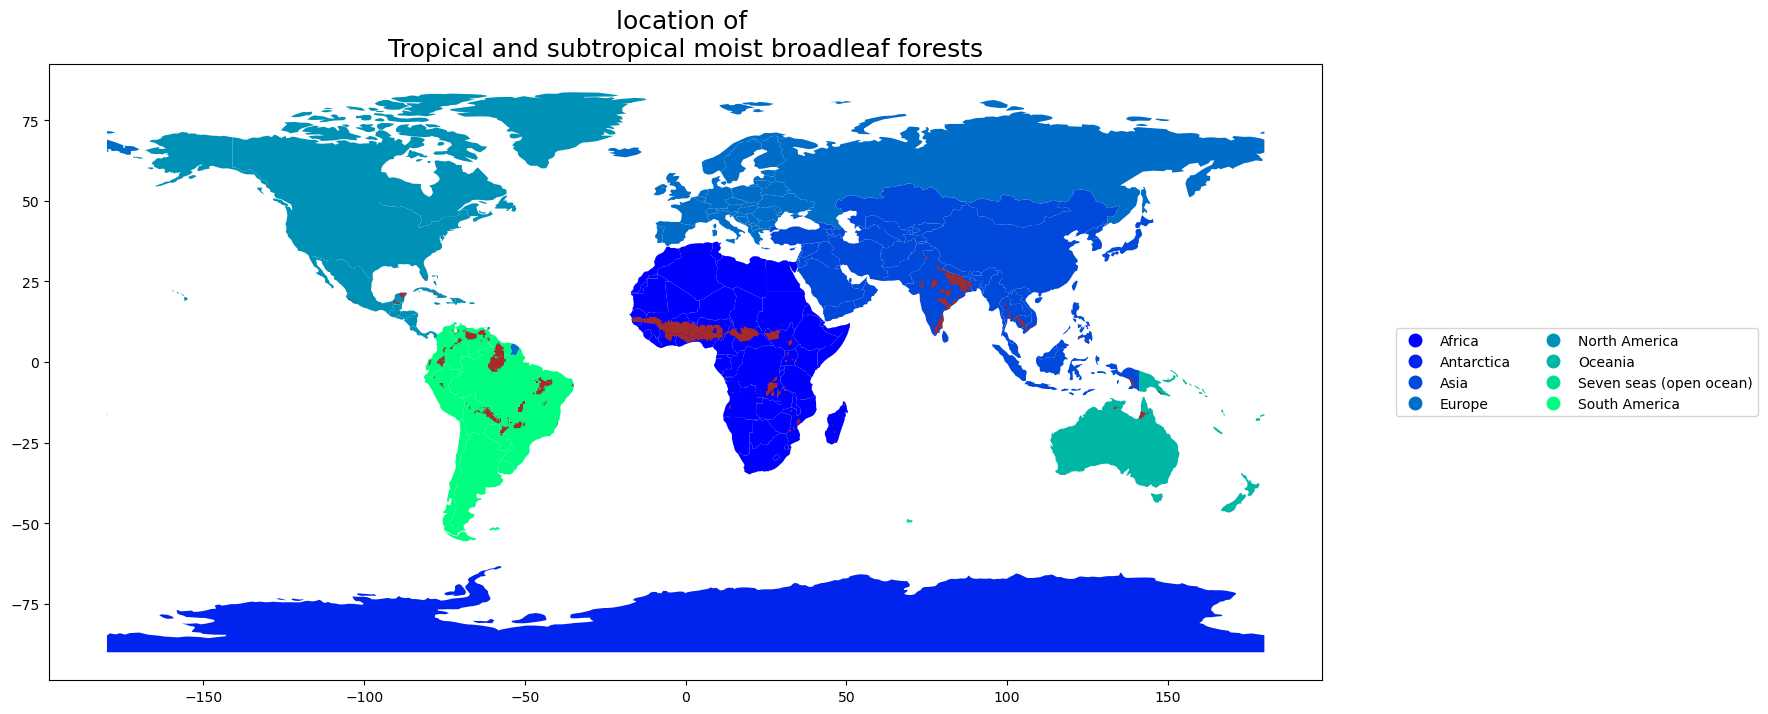

In [16]:
plot_within(world_data, 'continent', 'location of \nTropical and subtropical moist broadleaf forests', 2)

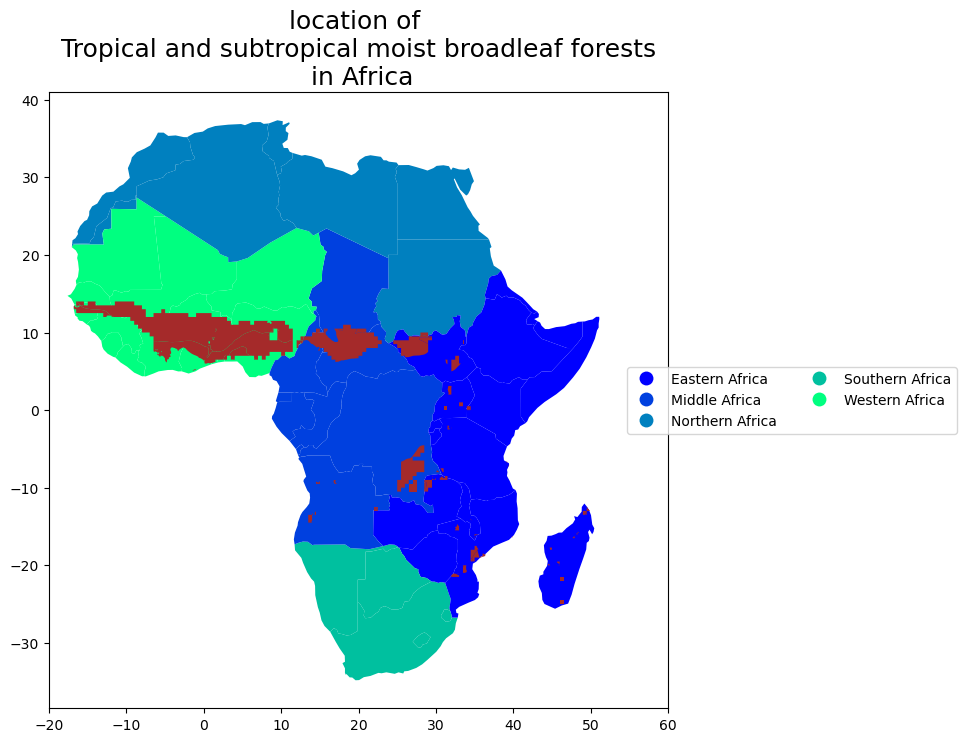

In [17]:
plot_within(continent, 'subregion', 'location of \nTropical and subtropical moist broadleaf forests\n in Africa', 2)
plt.xlim(-20,60);

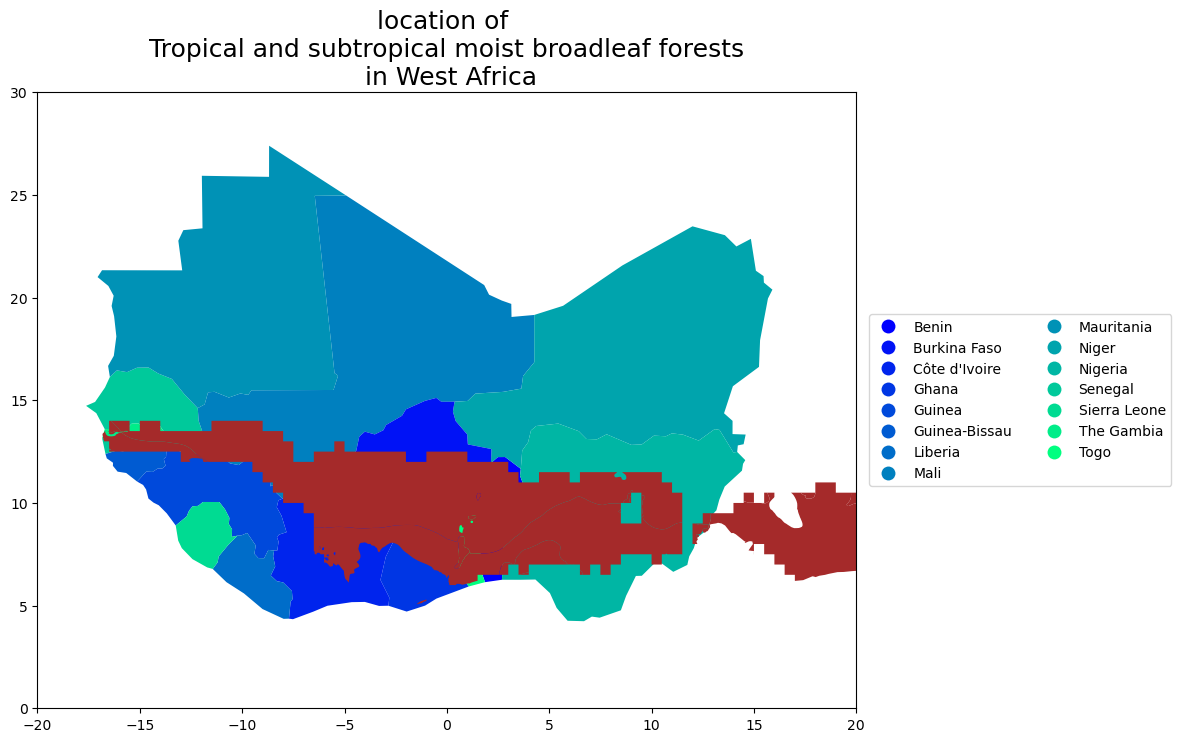

In [18]:
plot_within(subregion, 'country', 'location of \nTropical and subtropical moist broadleaf forests\n in West Africa', 2)
plt.xlim(-20,20)
plt.ylim(0,30);

### AgroEcological zones

In [19]:
path = 'data/Bioclimatic and ecological zones/GlobalAgroEcologicalZones_GAEZ.geojson'
agros = {1: 'Steep terrain', 2: 'Artic/Cold', 3: 'Desert/Arid', 4: 'Irrigated Soils', 5: 'Hydromorphic soils', 
 6: 'Dry, good soils', 7: 'Dry, moderate soils', 8: 'Dry, poor soils', 9: 'Moist, good soils', 
 10: 'Moist, moderate soils', 11: 'Moist, poor soils', 12: 'Sub-humid, good soils', 13: 'Sub-humid, moderate soils', 
 14: 'Sub-humid, poor soils', 15: 'Humid, good soils', 16: 'Humid, moderate soils',
         17: 'Humid, poor soils', 18:'Water'}

agroeco_df = Read(path)
agroeco_df = agroeco_df.wrangle(replace_values = True, column_to_replace = 'value',
                                replacing_values =agros, clip = True)
agroeco_df.head()

,value,geometry,centroid
86413,"Sub-humid, moderate soils","POLYGON ((12.60000 8.65000, 12.50000 8.65000, ...",POINT (-12.57179 12.53846)
85043,Irrigated Soils,"POLYGON ((-4.10000 12.35000, -4.15000 12.35000...",POINT (5.87500 14.37500)
84976,"Dry, poor soils","POLYGON ((-5.00000 12.40000, -5.10000 12.40000...",POINT (1.22500 14.41250)
85691,Hydromorphic soils,GEOMETRYCOLLECTION (POLYGON ((-3.65000 12.4000...,POINT (7.12500 13.37500)
86076,"Sub-humid, moderate soils","POLYGON ((-3.00000 12.40000, -3.10000 12.40000...",POINT (-15.73864 12.75455)


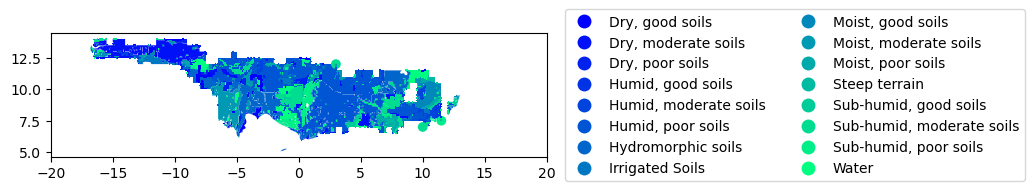

In [20]:
plot(agroeco_df, 'value')

### climate

In [21]:
climates = {1: 'Warm Temperate Moist', 2: 'Warm Temperate Dry', 3: 'Cool Temperate Moist', 4: 'Cool Temperate Dry', 
5: 'Polar Moist', 6: 'Polar Dry', 7: 'Boreal Moist', 8: 'Boreal Dry', 9: 'Tropical Montane', 10: 'Tropical wet',
 11: 'Tropical Moist', 12: 'Tropical Dry'}

In [22]:
url = 'data/climate/IPCC_ClimateZoneMap_Vector.geojson'

climate = Read(url)
climate = climate.wrangle(replace_values = True, column_to_replace = 'class_name',
               replacing_values = climates, clip = True)
climate = climate.drop((climate[climate['class_name'] == 0]).index)
climate.head()

,class_name,geometry,centroid
20017,Tropical Moist,"MULTIPOLYGON (((-15.60000 13.40000, -15.75000 ...",POINT (-15.37500 11.80682)
18162,Tropical Montane,"POLYGON ((-16.25000 13.40000, -16.24484 13.400...",POINT (12.20000 22.67500)
18183,Tropical Montane,GEOMETRYCOLLECTION (POLYGON ((-16.50000 13.451...,POINT (11.95000 22.62500)
20564,Tropical Montane,"POLYGON ((9.00000 10.40000, 8.90000 10.40000, ...",POINT (12.55000 8.62500)
20600,Tropical Montane,"POLYGON ((8.90000 10.35000, 8.85000 10.35000, ...",POINT (11.95000 8.37500)


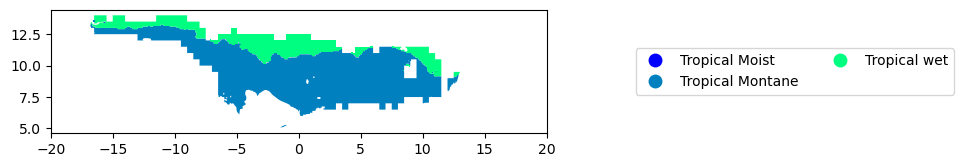

In [23]:
plot(climate, 'class_name')

###### Climate_shifts

In [24]:
def climate_shifts(year, scenario):
    replace = {
    11: 'Af', 12 :'Am', 13 : 'As', 14 : 'Aw', 21 : 'BWk', 22 : 'BWh', 26 : 'BSk', 27 : 'BSh',
    31 : 'Cfa', 32 : 'Cfb', 33 : 'Cfc', 34 : 'Csa', 35 : 'Csb', 36 : 'Csc', 37 : 'Cwa', 38 : 'Cwb', 
    39 : 'Cwc', 41 : 'Dfa', 42 : 'Dfb', 43 : 'Dfc', 44 : 'Dfd', 45 : 'Dsa', 46 : 'Dsb', 47 :'Dsc', 
    48 :'Dsd', 49 : 'Dwa', 50 : 'Dwb', 51 : 'Dwc', 52 : 'Dwd', 61 : 'EF', 62 :'ET',
    }
    if scenario:
        clim_shift = Read(f'data/climate/KoppenGeigerClimateShifts/{year}-{scenario}.geojson')
    else:   
        clim_shift = Read(f'data/climate/KoppenGeigerClimateShifts/{year}.geojson')
    clim_shift = clim_shift.wrangle(replace_values = True,
               column_to_replace= 'gridcode', replacing_values = replace, clip = True)
    
    return clim_shift

In [25]:
def plot_climate_shifts(years, scenario, title):
    fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15,10))
    for i in range(len(years)):
        if scenario:
            climate_shifts(years[i], scenario).plot(column = 'gridcode', ax = ax[i], cmap = 'winter',
                                                    legend = True)
        else:
            climate_shifts(years[i], None).plot(column = 'gridcode', ax = ax[i], cmap = 'winter',
                                                legend = True)
        ax[i].set_title(years[i], fontdict = {'fontsize': 10})
    for ax in ax.flat:
        ax.axis('off')
        ax.set_xlim(left=-20, right=20)
        ax.set_ylim(bottom=0, top=20)
    plt.suptitle(title, y =0.7,
                 size = 24)
    fig.tight_layout(pad = 0.2)

<b>1901 - 2000 (No scenarios)

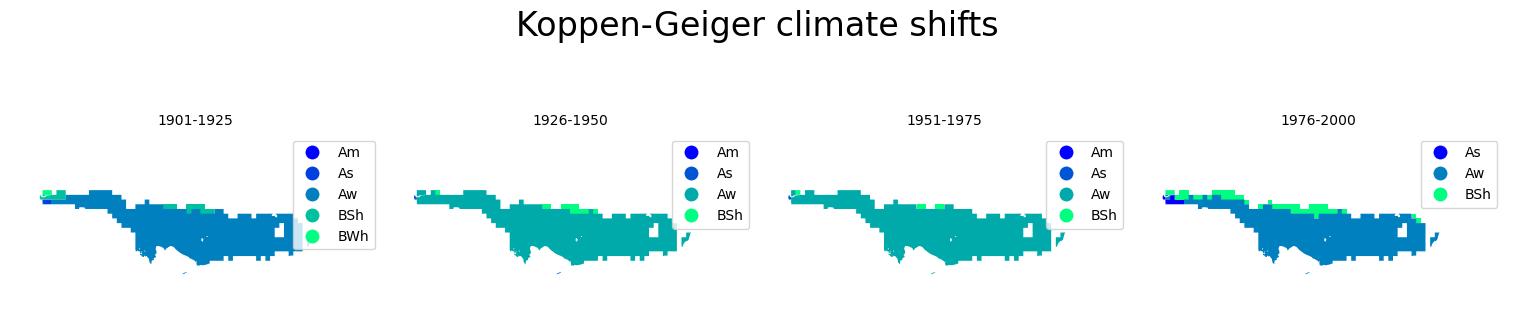

In [26]:
years = ['1901-1925', '1926-1950', '1951-1975', '1976-2000']
plot_climate_shifts(years, None, 'Koppen-Geiger climate shifts',)

<b>A1F1

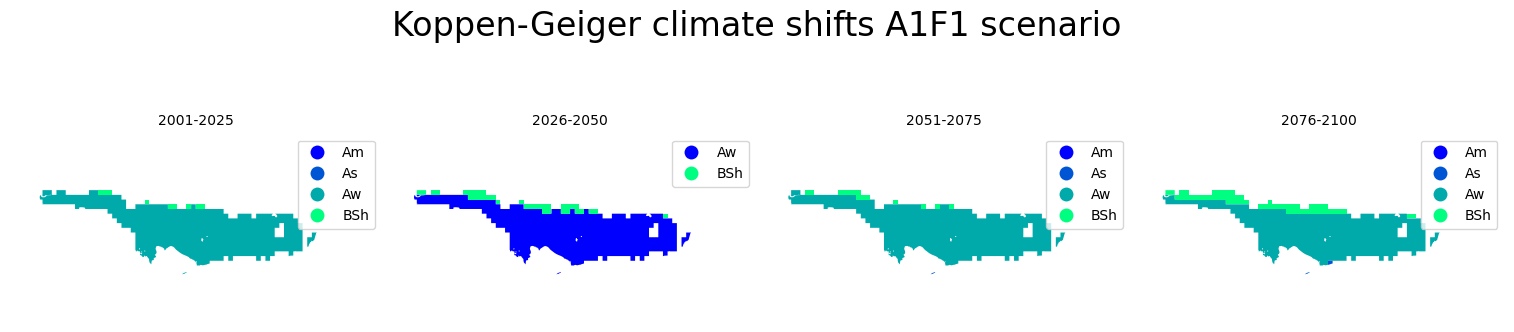

In [27]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'A1FI', 'Koppen-Geiger climate shifts A1F1 scenario')

<b>A2

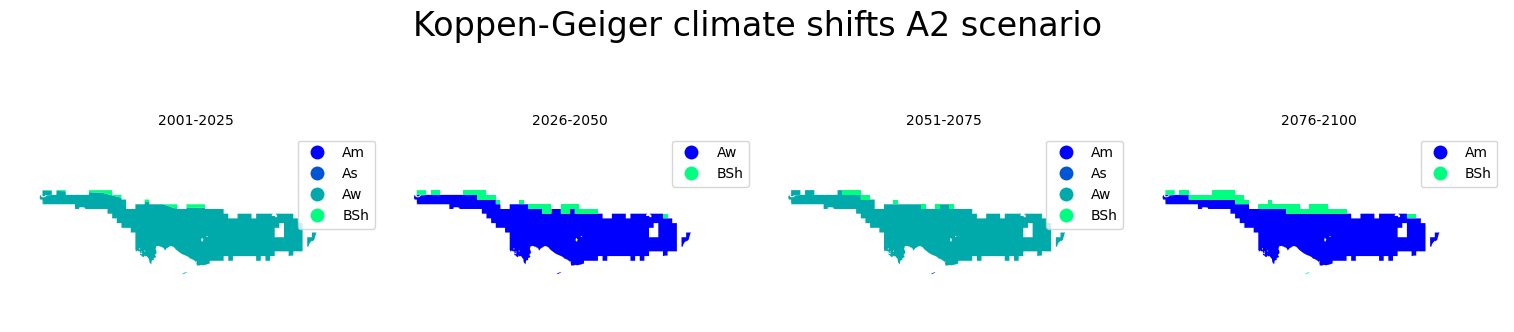

In [28]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'A2', 'Koppen-Geiger climate shifts A2 scenario')

<b>B1

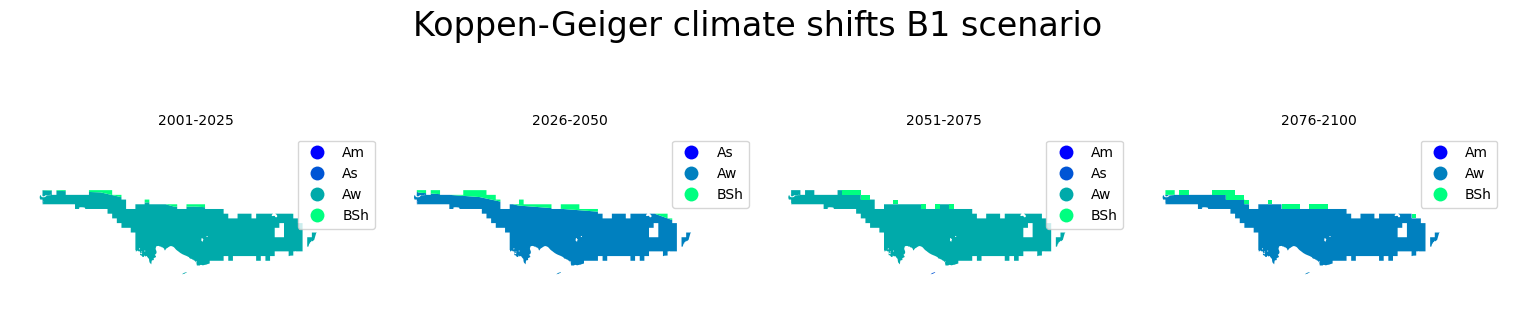

In [29]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'B1', 'Koppen-Geiger climate shifts B1 scenario')

<b>B2

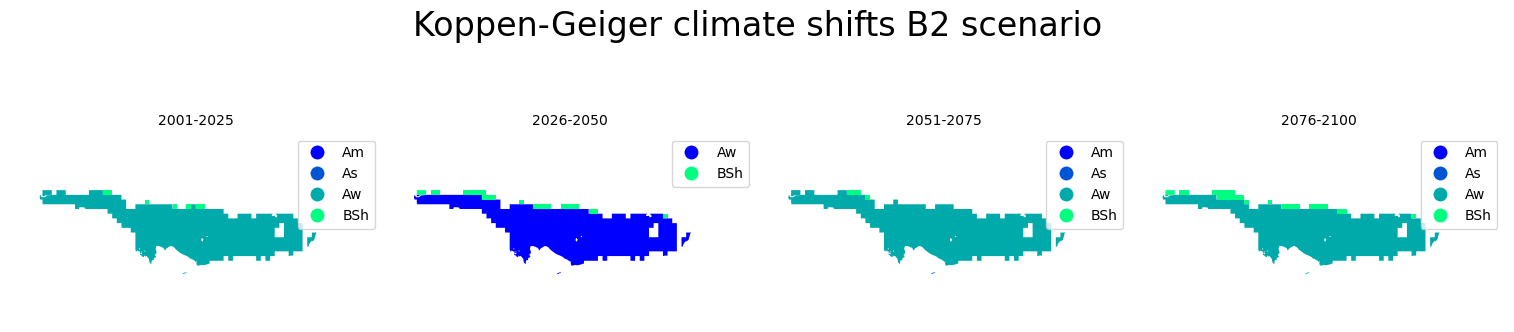

In [30]:
years = ['2001-2025', '2026-2050', '2051-2075', '2076-2100']
plot_climate_shifts(years, 'B2', 'Koppen-Geiger climate shifts B2 scenario')

In [31]:
def read_tiff(data, title):
    f, ax = plt.subplots(1, 2, figsize=(10, 4))
    for i in range(len(data)):
        path = f'data/Bioclimatic and ecological zones/{data[i]}.tif'
        tiff_data = rxr.open_rasterio(path, masked=True).squeeze()
        clipped1 = tiff_data.rio.clip(fav_forest.geometry.apply(mapping),
                                          # This is needed if your GDF is in a diff CRS than the raster data
                                          fav_forest.crs)
        fav_forest.plot(ax = ax[i], color = 'brown')
        clipped1.plot(ax=ax[i], cmap = 'winter')
        ax[i].set_title(data[i], fontdict = {'fontsize': 10})
    for ax in ax.flat:
        ax.axis('off')
        ax.set_xlim(left=-20, right=20)
        ax.set_ylim(bottom=0, top=20)
    plt.suptitle(title, y = 1.2,
                 size = 24)
    f.tight_layout(pad = 0.2)

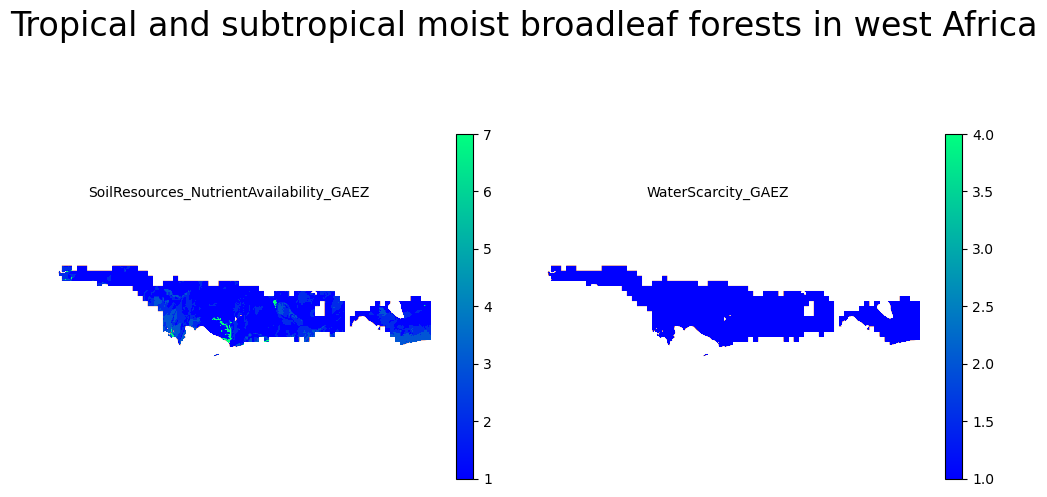

In [32]:
read_tiff(['SoilResources_NutrientAvailability_GAEZ',
          'WaterScarcity_GAEZ'], 'Tropical and subtropical moist broadleaf forests in west Africa')

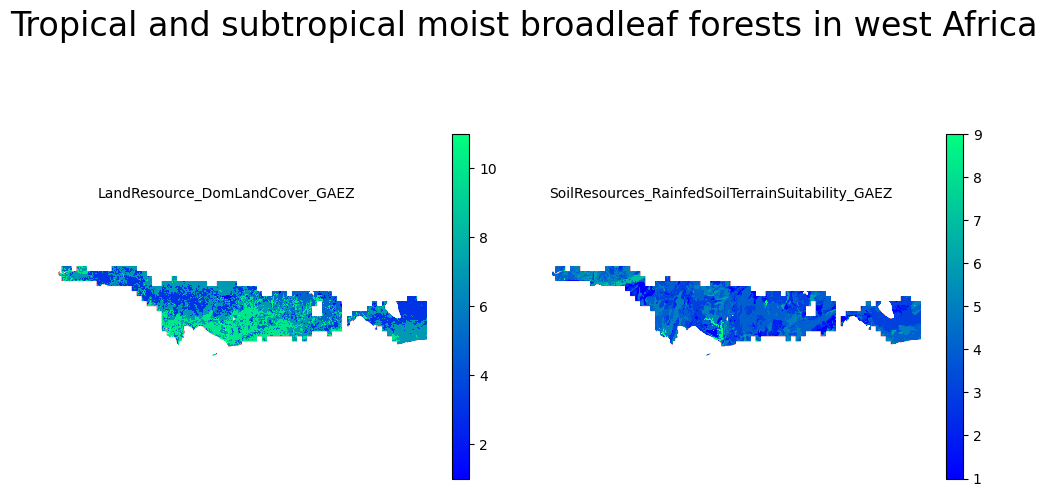

In [33]:
read_tiff(['LandResource_DomLandCover_GAEZ',
          'SoilResources_RainfedSoilTerrainSuitability_GAEZ'], 'Tropical and subtropical moist broadleaf forests in west Africa')

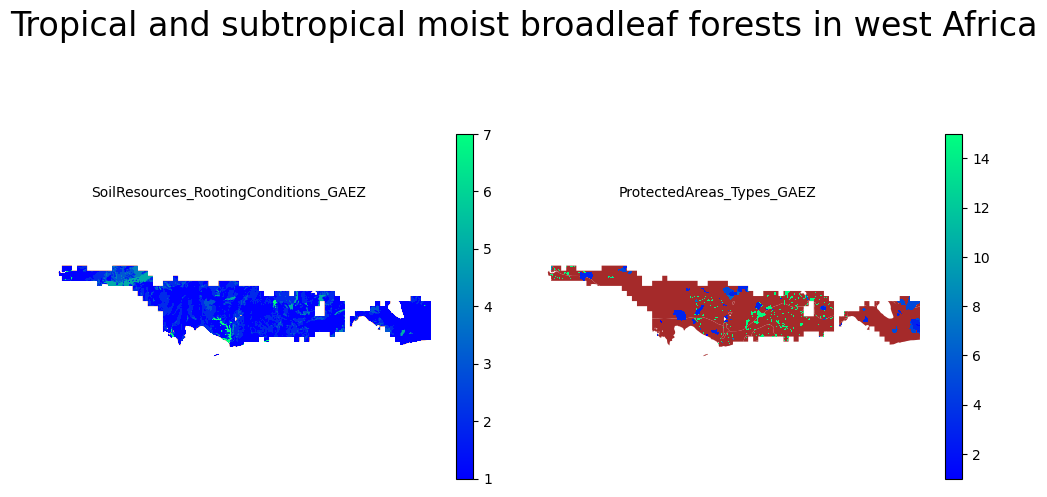

In [34]:
read_tiff(['SoilResources_RootingConditions_GAEZ',
          'ProtectedAreas_Types_GAEZ'], 'Tropical and subtropical moist broadleaf forests in west Africa')

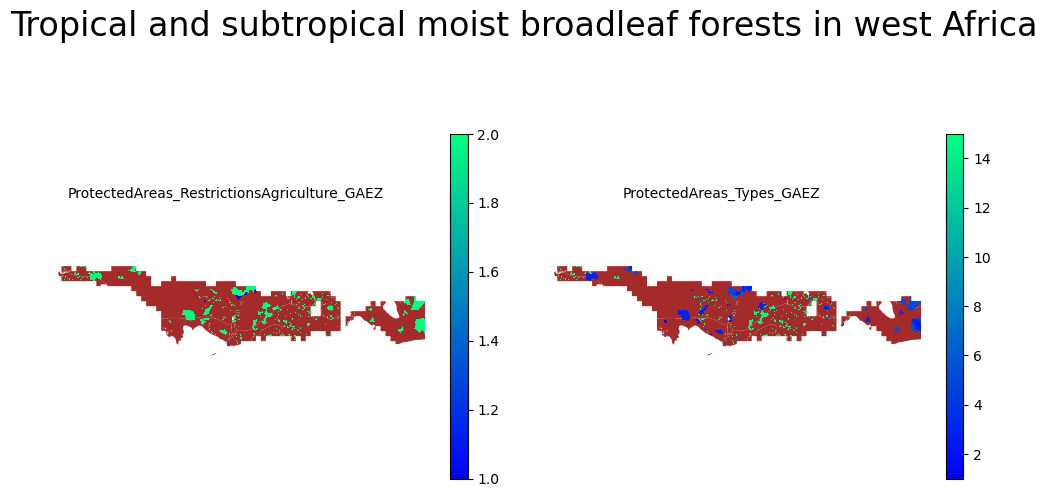

In [35]:
read_tiff(['ProtectedAreas_RestrictionsAgriculture_GAEZ',
          'ProtectedAreas_Types_GAEZ'], 'Tropical and subtropical moist broadleaf forests in west Africa')

 ##### Forests

<b>Managed forests concession

In [36]:
def plot_within(data, column = None):
    ax = fav_forest.plot(figsize= (20, 8))
    data.plot(ax = ax, cmap = 'winter', column = column, legend = True)
    plt.title('title', fontdict = {'fontsize' : 18});

In [37]:
url = 'https://datasets.mojaglobal.workers.dev/0:/LandCover/Forest/ManagedForestConcessions/ManagedForestConcessions_LBR.geojson'
forest_concession = Read(url)
forest_concession.retrieve_data()
forest_concession = forest_concession.wrangle(online = True)
forest_concession.head(2)

,id,objectid,country,name,company,group_comp,group_coun,legal_term,status,province,source,last_updat,shape_leng,area_geo,shape_length,shape_area,geometry,centroid
0,47,47,LBR,FMC a,,,,,,,,,1.998015,1.143232e+09,1.998015,0.093627,"POLYGON ((-9.63809 7.58342, -9.67405 7.61019, ...",POINT (-9.71605 7.35382)
1,48,48,LBR,FMC b,,,,,,,,,1.157871,5.563628e+08,1.157871,0.045417,"POLYGON ((-9.44694 5.81031, -9.51802 5.82799, ...",POINT (-9.41711 5.68310)


(0.0, 20.0)

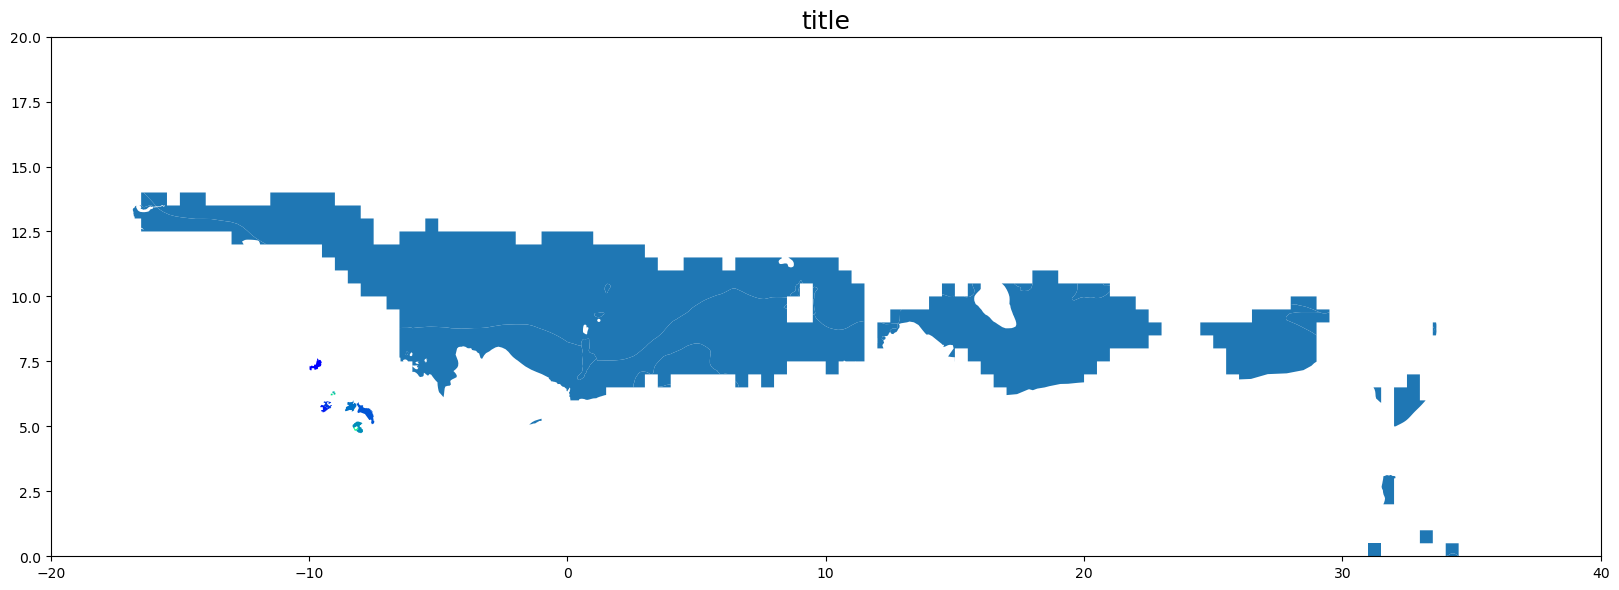

In [38]:
plot_within(forest_concession, )
plt.xlim(-20, 40)
plt.ylim(0, 20)

data on managed forest concession for liberia want to check if the forest covers it

In [39]:
soil_resource = Read('https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/World_Soil_Resources_wgs84.geojson')
soil_resource.retrieve_data()
soil_resource = soil_resource.wrangle(online = True, clip = True)
# soil_resource = gpd.clip(soil_resource, fav_forest)
soil_resource.head()
# soil_resources.append(soil_resource)
# soil = gpd.GeoDataFrame( pd.concat(soil_resources, ignore_index=True) )

,sname,ipcc,geometry,centroid
29,SC,Solonchak,"POLYGON ((-16.69050 13.49840, -16.68962 13.421...",POINT (32.76967 7.95292)
19,LP,Leptosol,"POLYGON ((-13.65842 12.51527, -13.62403 12.626...",POINT (46.24798 32.16133)
22,LX,Lixisol,"MULTIPOLYGON (((-15.50943 12.57236, -15.27594 ...",POINT (31.59579 0.76833)
1,AC,Acrisol,"MULTIPOLYGON (((-8.45671 10.58976, -8.39444 10...",POINT (19.45196 8.64741)
32,WAT,Waterbodies,"POLYGON ((-1.06610 8.77062, -1.16242 8.85830, ...",POINT (-7.03050 40.05349)


(-20.0, 20.0)

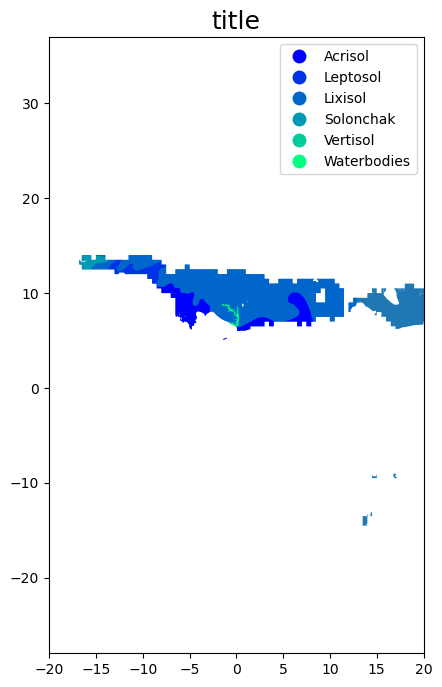

In [40]:
plot_within(soil_resource, 'ipcc')
plt.xlim(-20, 20)

Text(0.5, 1.0, 'a')

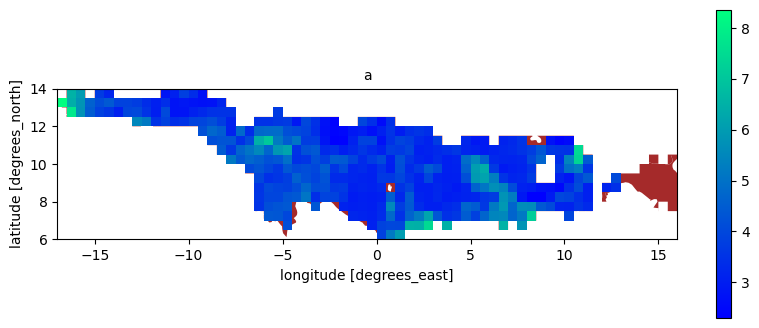

In [41]:
f, ax = plt.subplots(figsize=(10, 4))
path = f'data/soil/GlobalSoilOrganicCarbonDensityinkgCm_1mDepth.tif'
tiff_data = rxr.open_rasterio(path, masked=True).squeeze()
clipped1 = tiff_data.rio.clip(subregion.geometry.apply(mapping),
                                          # This is needed if your GDF is in a diff CRS than the raster data
                                          subregion.crs)
clipped1 = clipped1.rio.clip(fav_forest.geometry.apply(mapping),
                                          # This is needed if your GDF is in a diff CRS than the raster data
                                          fav_forest.crs)
fav_forest.plot(ax = ax, color = 'brown')
clipped1.plot(ax=ax, cmap = 'winter')
ax.set_title('a', fontdict = {'fontsize': 10})